In [1]:
#required imports statemens for visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import warnings; warnings.filterwarnings(action='once')

#Matplotlib redefine its own aesthetics.
large=22; med=16; small=12
params = {'axes.titlesize':large,
         'legend.fontsize':med,
         'figure.figsize':(16,10),
         'axes.labelsize':med,
         'axes.titlesize':med,
         'xtick.labelsize':med,
         'ytick.labelsize':med,
         'figure.titlesize':large
         }

plt.rcParams # command to check default list of rcParams
plt.rcParams.update(params) #updating rcParams
plt.rcParams.get('figure.figsize') #checking updated params - 'figure.figsize'

plt.style.use('seaborn-whitegrid') #setting up mpl style
sns.set_style('white') #setting up sns style

print(mpl.__version__) #matplotlib version
sns.__version__ #seaborn version

#inlining matplotlib results
%matplotlib inline 

3.4.3


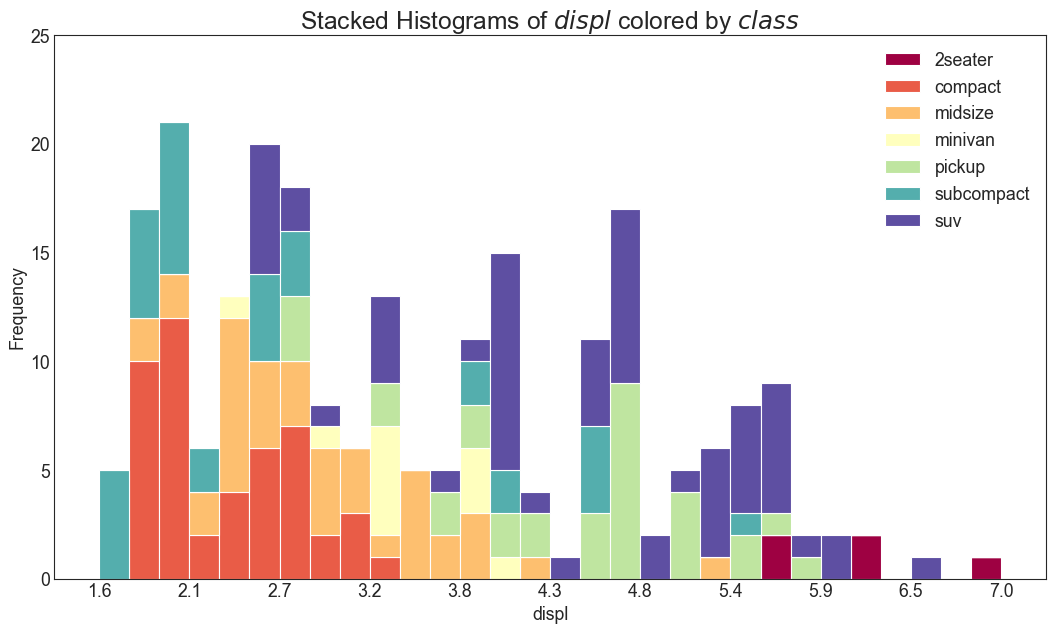

In [2]:
#loading dataset
df = pd.read_csv('mpg_ggplot.csv')

#defining variables
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var,groupby_var ]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

#drawing
plt.figure(figsize=(16,9), dpi=80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n,bins,patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

#Decorations
plt.title(f"Stacked Histograms of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.xlabel(x_var)
plt.ylabel('Frequency')
plt.ylim(0,25)
plt.xticks(ticks=bins[::3],labels=[round(b,1) for b in bins[::3]])
plt.show()